# 반응형 그래프 및 머신 러닝 예제

### 주요 내용

1. plotly를 활용한 반응형 그래프 생성 예제
2. sklearn을 활용한 머신 러닝 예제

<br>
<hr>
<br>

## 예제 및 실습 데이터 불러오기

In [ ]:
# 데이터 불러오기
import pandas as pd
df_ins = pd.read_csv('data/insurance.csv')
df_ins.head()

In [ ]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head()

<br>
<hr>
<br>

## 1. 반응형 그래프의 활용

**plotly**를 활용해서 반응형 그래프를 그려서 탐색적 데이터 분석(EDA) 과정에서 유용하게 활용 가능

* 참고: [Plotly](https://plotly.com/python/)

In [ ]:
import seaborn as sns
import plotly.express as px

C:\Users\jhpark\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



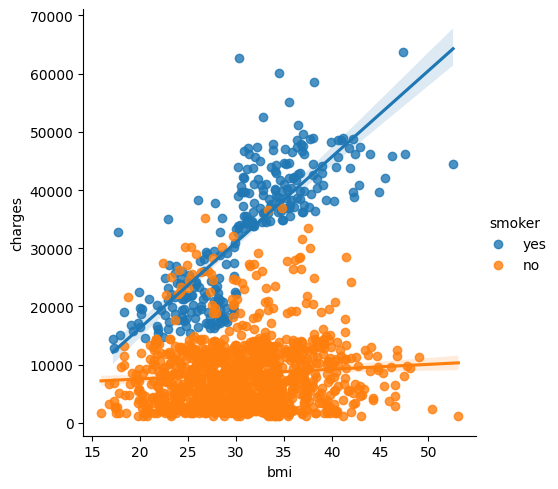

In [19]:
# seaborn을 활용한 산점도 
sns.lmplot(data=df_ins, 
                x='bmi',
                y='charges', 
                hue='smoker')

In [ ]:
px.scatter(df_ins,
           x='bmi',
           y='charges', 
           color='smoker', width=600)

In [ ]:
# 다양한 옵션의 활용
px.scatter(df_ins,
           x='bmi',
           y='charges', 
           color='smoker', 
           size='age', 
           symbol='region', width=800)

In [ ]:
# facet(분할)의 활용
px.scatter(df_ins,
           x='bmi',
           y='charges', 
           color='smoker', 
           facet_row='sex', 
           facet_col='region', 
           width=800, 
           template='simple_white')

In [ ]:
# plotly 그래프가 나오지 않을 때 실행
# import plotly.offline as pyo
# pyo.init_notebook_mode()

#### [실습]
1. df_sp에서 `parental level of education`별로 색을 다르게 한  `math score`와 `reading score`의 산점도 그리기 
2. plotly로 다양한 그래프 작성해보기

<Axes: xlabel='math score', ylabel='reading score'>

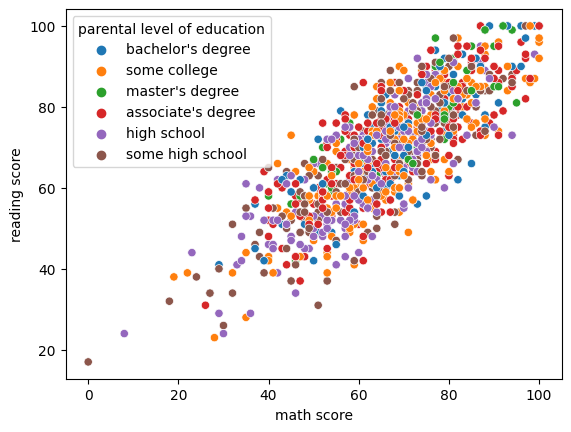

In [14]:
sns.scatterplot(data=df_sp, x='math score', y='reading score', hue='parental level of education')

C:\Users\jhpark\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



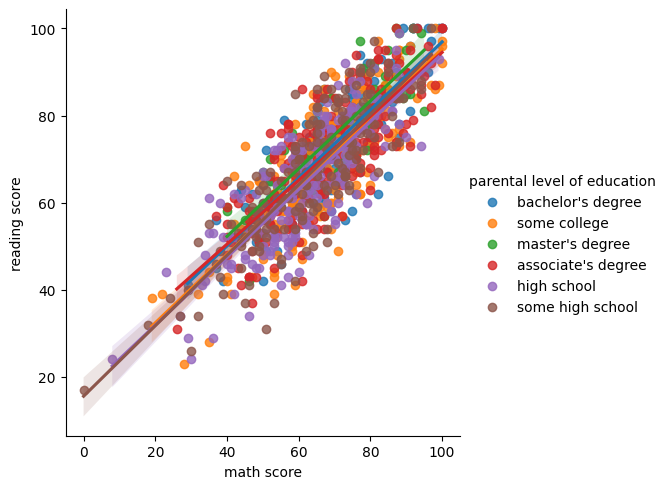

In [17]:
# Plot sepal width as a function of sepal_length across days
sns.lmplot(
    data=df_sp,
    x='math score', y='reading score', hue='parental level of education'
)


In [13]:
px.scatter(df_sp, x='math score', y='reading score', color='parental level of education')

In [16]:
figure= px.scatter_3d(df_sp, x='math score', y='reading score', z='writing score', color='parental level of education')
figure.update_traces(marker_size=1)

## 2. 머신 러닝을 활용한 요인 탐색

In [20]:
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

In [21]:
# 데이터 처리
y = df_ins['charges']
X = pd.get_dummies(df_ins.drop(columns='charges'), drop_first=True)
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [22]:
# 모형 적합
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(X, y)

DecisionTreeRegressor(max_depth=4)

In [26]:
# 다양한 옵션의 활용
px.scatter(df_ins,
           x='bmi',
           y='charges', 
           color='smoker', 
           size='age' , width=800)

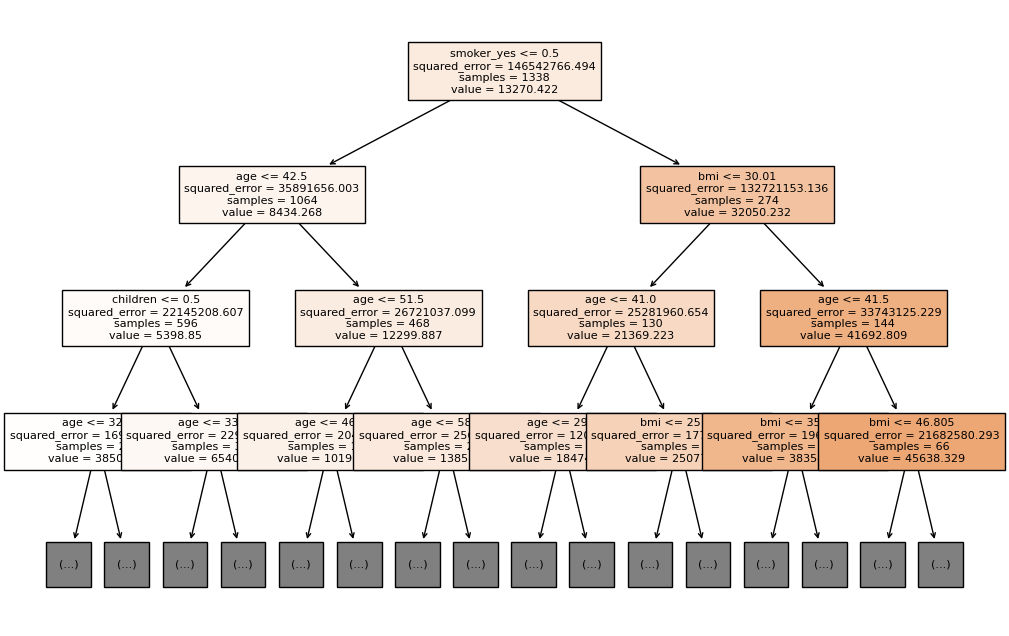

In [23]:
# 모형 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=[12, 8])
tree.plot_tree(model, fontsize=8, max_depth=3, filled=True, feature_names=list(X.columns))
plt.show()

#### End of script